<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/08.%20Week%208/Notebook/03_Kernel_Trick_Triumph_Navigating_Non_Linear_SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

Jumlah sampel: 178
Jumlah fitur: 13
Jumlah kelas: 3
Nama fitur: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Nama target: ['class_0' 'class_1' 'class_2']


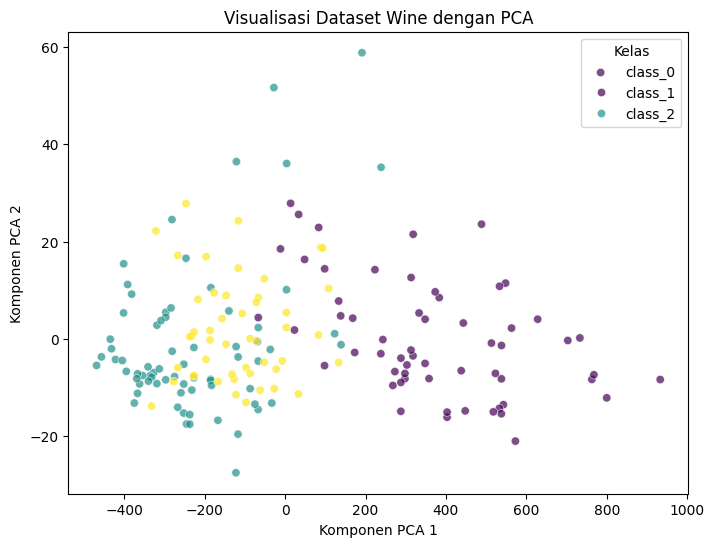

In [ ]:
# %%
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

# Memuat dataset Wine
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Menampilkan informasi dataset
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y))}")
print(f"Nama fitur: {wine.feature_names}")
print(f"Nama target: {wine.target_names}")

# Visualisasi beberapa fitur menggunakan PCA untuk reduksi dimensi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("Visualisasi Dataset Wine dengan PCA")
plt.legend(title='Kelas', labels=wine.target_names)
plt.show()

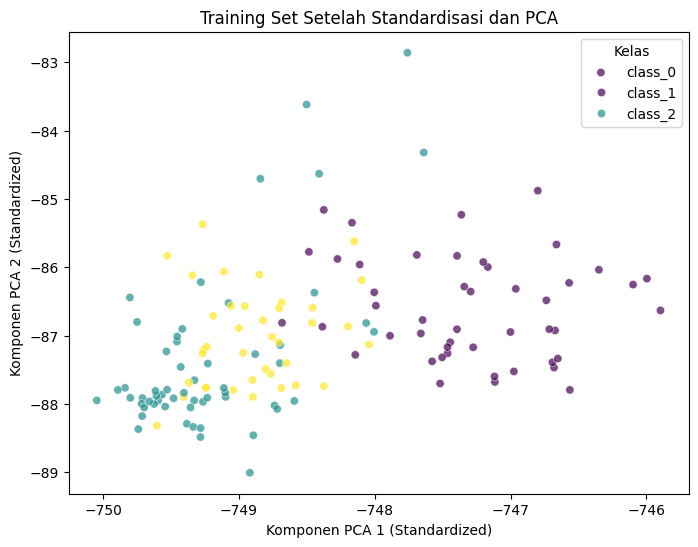

In [ ]:
# %%
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualisasi data yang telah di-standardisasi dengan PCA
X_train_pca = pca.transform(X_train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', alpha=0.7)
plt.xlabel("Komponen PCA 1 (Standardized)")
plt.ylabel("Komponen PCA 2 (Standardized)")
plt.title("Training Set Setelah Standardisasi dan PCA")
plt.legend(title='Kelas', labels=wine.target_names)
plt.show()

In [ ]:
# %%
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk C dan gamma
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Inisialisasi SVM dengan kernel RBF
svc = svm.SVC(kernel='rbf')

# Grid Search dengan cross-validation 5-fold
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Menampilkan hasil Grid Search
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'C': 1, 'gamma': 'scale'}
Best cross-validation accuracy: 0.9862068965517242


Akurasi pada data testing: 0.97


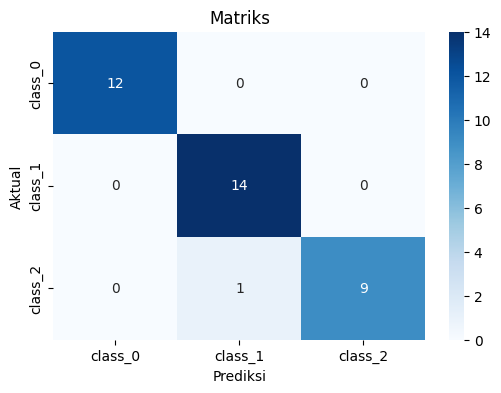

Laporan Klasifikasi:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
# %%
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menggunakan model terbaik dari Grid Search
best_clf = grid_search.best_estimator_

# Prediksi pada data testing
y_pred = best_clf.predict(X_test_scaled)

# Evaluasi performa
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data testing: {accuracy:.2f}")

# Matriks kebingungan
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks")
plt.show()

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

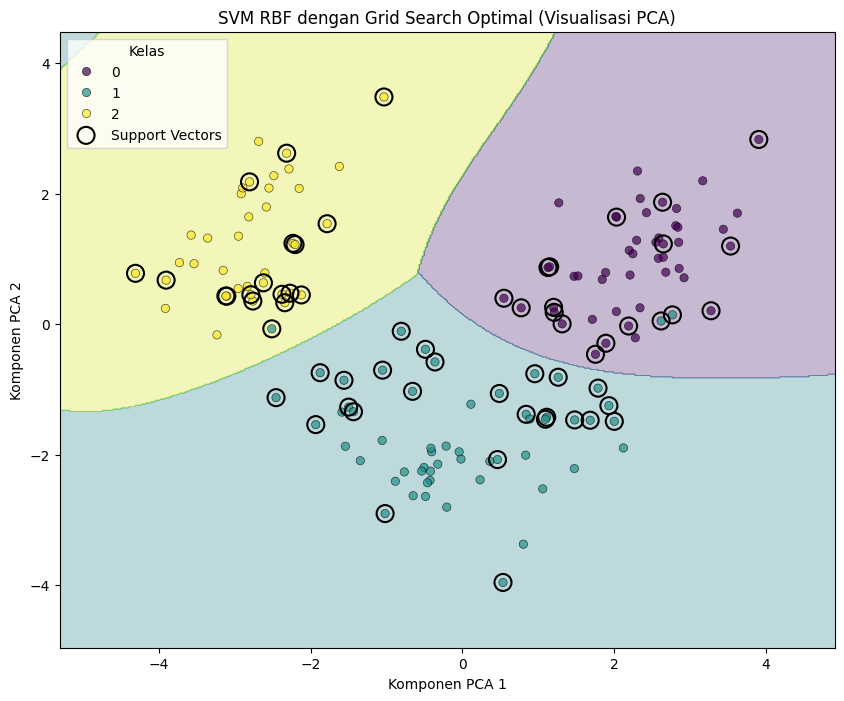

In [ ]:
# %%
from matplotlib.colors import ListedColormap

# Reduksi dimensi ke 2 menggunakan PCA untuk visualisasi
pca_vis = PCA(n_components=2)
X_train_pca_vis = pca_vis.fit_transform(X_train_scaled)
X_test_pca_vis = pca_vis.transform(X_test_scaled)

# Melatih ulang model dengan dua komponen PCA
svc_pca = svm.SVC(kernel='rbf', C=grid_search.best_params_['C'],
                 gamma=grid_search.best_params_['gamma'])
svc_pca.fit(X_train_pca_vis, y_train)

# Membuat grid untuk visualisasi decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_pca_vis[:, 0].min()-1, X_train_pca_vis[:, 0].max()+1, 500),
                     np.linspace(X_train_pca_vis[:, 1].min()-1, X_train_pca_vis[:, 1].max()+1, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Menggunakan model untuk memprediksi kelas setiap titik pada grid
Z = svc_pca.predict(grid).reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 8))
# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot training points
sns.scatterplot(x=X_train_pca_vis[:, 0], y=X_train_pca_vis[:, 1], hue=y_train, palette='viridis', alpha=0.7, edgecolor='k')

# Menandai support vectors
support_vectors_pca = pca_vis.transform(best_clf.support_vectors_)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1],
           s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.xlabel("Komponen PCA 1")
plt.ylabel("Komponen PCA 2")
plt.title("SVM RBF dengan Grid Search Optimal (Visualisasi PCA)")
plt.legend(title='Kelas')
plt.show()


## Memahami Parameter `gamma` dalam SVM dengan Kernel RBF

Parameter `gamma` dalam SVM dengan kernel RBF adalah **koefisien kernel** yang mengontrol **jangkauan pengaruh** dari sebuah titik data. Secara teknis, `gamma` menentukan seberapa jauh pengaruh satu titik data terhadap lingkungan sekitarnya. Dengan kata lain, `gamma` mengatur **lebar kernel**.

### Rumus Kernel RBF

Kernel RBF didefinisikan sebagai:

$$
K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
$$

Dimana:
- $ x_i $ dan $ x_j $ adalah dua titik data.
- $ \|x_i - x_j\|^2 $ adalah jarak Euclidean antara kedua titik data.
- $ \gamma $ adalah parameter yang mengontrol pengaruh dari jarak tersebut.

### Interpretasi `gamma`

- **Nilai `gamma` Tinggi:**
  - Menghasilkan kernel dengan lebar yang **sempit**.
  - Setiap titik data hanya mempengaruhi lingkungan sekitarnya yang **sangat dekat**.
  - Model menjadi **lebih kompleks** karena fokus pada detail lokal dari data pelatihan.
  - **Risiko Overfitting** meningkat karena model dapat menangkap noise dan fluktuasi kecil dalam data.

- **Nilai `gamma` Rendah:**
  - Menghasilkan kernel dengan lebar yang **lebar**.
  - Setiap titik data mempengaruhi lingkungan yang **lebih luas**.
  - Model menjadi **lebih sederhana** karena fokus pada tren global dari data.
  - **Risiko Underfitting** meningkat karena model mungkin tidak cukup menangkap kompleksitas data.

## Pengaruh Variasi Nilai `gamma` pada Model SVM RBF

### 1. Decision Boundary dan Kompleksitas Model

- **`gamma` Tinggi:**
  - **Decision Boundary:** Sangat fleksibel dan dapat membentuk kurva yang kompleks untuk memisahkan kelas.
  - **Kompleksitas:** Tinggi, model dapat menyesuaikan diri secara detail dengan data pelatihan.

- **`gamma` Rendah:**
  - **Decision Boundary:** Lebih sederhana dan cenderung berbentuk garis lurus atau kurva yang halus.
  - **Kompleksitas:** Rendah, model fokus pada tren global dan mengabaikan fluktuasi lokal.

### 2. Pengaruh terhadap Support Vectors

- **`gamma` Tinggi:**
  - **Support Vectors:** Lebih banyak titik data yang menjadi support vectors karena margin yang sempit dan decision boundary yang kompleks.

- **`gamma` Rendah:**
  - **Support Vectors:** Lebih sedikit titik data yang menjadi support vectors karena margin yang lebih lebar dan decision boundary yang lebih sederhana.

### 3. Akurasi pada Data Training dan Testing

- **`gamma` Tinggi:**
  - **Training Accuracy:** Tinggi karena model sangat menyesuaikan diri dengan data pelatihan.
  - **Testing Accuracy:** Bisa rendah jika model overfitting, terutama jika data pengujian memiliki noise.

- **`gamma` Rendah:**
  - **Training Accuracy:** Lebih rendah dibandingkan `gamma` tinggi karena model lebih sederhana.
  - **Testing Accuracy:** Lebih stabil dan cenderung lebih baik dalam generalisasi, mengurangi risiko overfitting.

### 4. Regularisasi dan Generalisasi

- **`gamma` Tinggi:**
  - **Regularisasi:** Lebih rendah karena model berusaha menyesuaikan diri secara maksimal dengan data pelatihan.
  - **Generalisasi:** Kurang baik jika `gamma` terlalu tinggi, karena model mungkin tidak menangkap pola yang relevan pada data baru.

- **`gamma` Rendah:**
  - **Regularisasi:** Lebih tinggi karena model lebih sederhana dan tidak terlalu menyesuaikan diri dengan data pelatihan.
  - **Generalisasi:** Lebih baik dalam banyak kasus karena model fokus pada pola global dan mengabaikan noise lokal.

## Ilustrasi Praktis dengan Grid Search

### 1. Grid Search dan Pemilihan `gamma` Terbaik

Dengan menggunakan `GridSearchCV`, Anda dapat mencari kombinasi optimal dari parameter `C` dan `gamma` untuk kernel RBF. Berikut adalah contoh bagaimana Grid Search membantu dalam memilih nilai `gamma` yang optimal:
